# Importing PyTorch and Torchvision

In this section, we import the necessary libraries for working with tensors, neural networks, and image datasets.

---



In [116]:
import torch
import torchvision 
from torchvision.datasets import MNIST

# Loading the MNIST Dataset

The following line loads the MNIST dataset into your project:

In [117]:
dataset=MNIST(root='/data',download=True)

In [118]:
len(dataset)

60000

In [119]:
test_dataset=MNIST(root='/data',train=False)
len(test_dataset)

10000

In [120]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Viewing an MNIST Sample Image

The following code retrieves the first image-label pair from the MNIST dataset and displays it:

Label 5


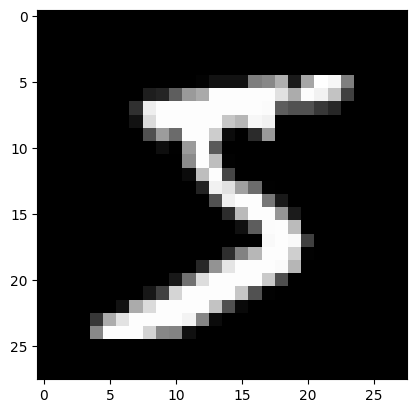

In [122]:
image , label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label',label)

In [123]:
import torchvision.transforms as transforms

In [124]:
dataset=MNIST(root='/data',train=True,transform=transforms.ToTensor())

This code retrieves the first image and label from the MNIST dataset using `img_tensor, label = dataset[0]`, where `img_tensor` is the image data and `label` is the corresponding digit (0–9). The line `print(img_tensor.shape, label)` then displays the shape of the image tensor along with its label. If `ToTensor()` was used when loading the dataset, the image will have the shape `torch.Size([1, 28, 28])`, where `1` represents the grayscale channel and `28×28` is the image size; otherwise, without a tensor transform, the image may be a PIL image and `.shape` may behave differently. In summary, this line helps you inspect both the structure of the image data and its ground-truth label.


In [125]:
img_tensor , label=dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The line `img_tensor[:, 10:15, 10:15]` extracts a 5×5 patch from the MNIST image by taking all channels (`:`) and selecting rows 10–14 and columns 10–14, allowing you to inspect the raw pixel values in that small region. Since MNIST tensors (after `ToTensor()`) contain values between 0 and 1, the printed numbers represent grayscale intensities where 0 is black, 1 is white, and anything in between is a shade of gray. The next line, `print(torch.max(img_tensor), torch.min(img_tensor))`, prints the highest and lowest pixel values in the entire image, helping you confirm the value range of the tensor—typically max = 1.0 and min = 0.0 for MNIST images.


In [126]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


The line `plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')` displays a small 5×5 region of the MNIST image by selecting channel 0 and slicing rows 10–14 and columns 10–14. This effectively zooms into a tiny patch of the digit, allowing you to visualize the raw pixel values. The `cmap='gray'` argument ensures the patch is shown in grayscale, where darker pixels represent lower values (closer to 0) and lighter pixels represent higher values (closer to 1).


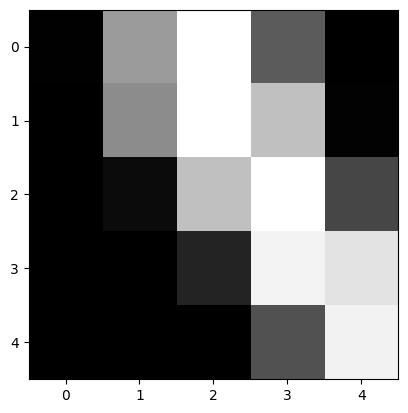

In [127]:
plt.imshow(img_tensor[0,10:15,10:15] , cmap='gray');

The `random_split` function is used to divide the MNIST dataset into two subsets. By calling `train_ds, val_ds = random_split(dataset, [50000, 10000])`, we randomly split the original 60,000-image dataset into a training set with 50,000 samples and a validation set with 10,000 samples. This is useful because the training set is used to fit the model, while the validation set helps evaluate performance during training to detect overfitting. The line `len(train_ds), len(val_ds)` simply returns the sizes of these two new subsets, confirming that the dataset was split correctly.


In [128]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

This code creates PyTorch DataLoaders for the training and validation sets. After importing `DataLoader`, a batch size of 128 is chosen, meaning the model will receive 128 images at a time during training. The line `train_loader = DataLoader(train_ds, batch_size, shuffle=True)` converts the training dataset into shuffled mini-batches, which helps the model generalize by presenting the samples in a random order each epoch. The validation loader, created via `val_loader = DataLoader(val_ds, batch_size)`, also groups samples into batches but without shuffling, since validation data is not used for learning—only for monitoring performance. These loaders make it easy to iterate through data efficiently during training and evaluation.


In [129]:
from torch.utils.data import DataLoader

batch_size=128

train_loader=DataLoader(train_ds , batch_size , shuffle=True)
val_loader= DataLoader(val_ds , batch_size)

This code constructs a simple neural network layer for MNIST classification. After importing PyTorch’s neural-network module (`torch.nn` as `nn`), the input size is set to `28*28`, since each MNIST image consists of 784 pixels flattened into a 1D vector. The number of output classes is defined as 10, corresponding to digits 0 through 9. The line `model = nn.Linear(input_size, num_classes)` creates a fully connected (linear) layer that maps the 784-dimensional input to 10 output values. This layer performs the computation `W*x + b`, making it equivalent to a multinomial logistic regression model. It produces one score per class, which will later be passed to a loss function such as cross-entropy during training.


In [130]:
import torch.nn as nn
input_size=28*28
num_classes=10

model=nn.Linear(input_size , num_classes)

The shape of `model.weight` reflects the configuration of the linear layer. Since the model is defined as `nn.Linear(784, 10)`, the weight matrix has shape `[10, 784]`, meaning there is one row of 784 weights for each of the 10 output classes. Calling `model.weight.ndim` returns `2` because the weight matrix is a 2-dimensional tensor (rows × columns). Printing `model.weight` shows the actual learnable parameters of the layer. These values are randomly initialized at the start and are updated during training as the network learns to classify the digits.


In [131]:
print(model.weight.shape)
print(model.weight.ndim)
model.weight

torch.Size([10, 784])
2


Parameter containing:
tensor([[ 0.0224, -0.0008, -0.0138,  ...,  0.0301,  0.0172, -0.0022],
        [ 0.0282,  0.0104,  0.0295,  ..., -0.0332, -0.0357, -0.0203],
        [-0.0198, -0.0067,  0.0206,  ..., -0.0184, -0.0350, -0.0210],
        ...,
        [ 0.0138, -0.0287, -0.0033,  ..., -0.0244, -0.0214,  0.0258],
        [-0.0124, -0.0239, -0.0003,  ...,  0.0107,  0.0291, -0.0252],
        [ 0.0224,  0.0210,  0.0228,  ..., -0.0124,  0.0206, -0.0283]],
       requires_grad=True)

In [132]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0239, -0.0052,  0.0221, -0.0127, -0.0246, -0.0313, -0.0287,  0.0329,
         0.0271,  0.0015], requires_grad=True)

This error occurs because the Linear layer expects the input to have a specific shape, but the images are being passed in without flattening. The model was defined as `nn.Linear(784, 10)`, which means it expects each input sample to be a 1D vector of size **784** (since 28×28 = 784). However, the batch of images arriving from the DataLoader has shape `[batch_size, 1, 28, 28]`, and when PyTorch internally tries to multiply this with the weight matrix of shape `[10, 784]`, the dimensions don't line up for matrix multiplication. The error `mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)` shows that PyTorch attempted to treat the input as a matrix with width 28 instead of 784, meaning the tensor was not flattened. Since matrix multiplication requires the inner dimensions to match, and 28 ≠ 784, PyTorch raises an error. Flattening the images to shape `[batch_size, 784]` fixes the issue and allows the Linear layer to perform the required multiplication.


In [133]:
images.shape

torch.Size([128, 1, 28, 28])

The expression `images.reshape(128, 784).shape` reshapes the batch of MNIST images from `[128, 1, 28, 28]` into `[128, 784]`. Each image originally has 1 channel and a 28×28 grid of pixels, but a linear layer (`nn.Linear`) requires the input to be a flat 1-dimensional vector. Calling `.reshape(128, 784)` takes all 28×28 = 784 pixel intensities from each image and flattens them into a single row, producing a batch where each of the 128 images is now represented as a 784-element vector. The resulting shape `(128, 784)` confirms that the batch has 128 samples and each sample has 784 features.


In [134]:
images.reshape(128, 784).shape

torch.Size([128, 784])

This class defines a simple neural network for MNIST using PyTorch. The model inherits from `nn.Module`, allowing PyTorch to track learnable parameters. In the constructor (`__init__`), a single linear layer is created with `nn.Linear(input_size, num_classes)`, mapping each 784-element flattened MNIST image to 10 output scores. The `forward` method defines how data flows through the model: the input batch `xb`, originally shaped `[batch_size, 1, 28, 28]`, is reshaped into `[batch_size, 784]` using `xb.reshape(-1, 784)`, where `-1` tells PyTorch to infer the batch size automatically. The flattened tensor is then passed through the linear layer to produce a tensor of shape `[batch_size, 10]`, representing the predicted scores (logits) for digits 0–9. Finally, `model = MnistModel()` creates an instance of the model with initialized weights, ready for training or inference.


In [135]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size , num_classes)

    def forward(self, xb):
        xb=xb.reshape(-1 , 784)
        out=self.linear(xb)
        return out

model=MnistModel()

In [136]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

The output in the screenshot shows the shapes and actual values of the learnable parameters inside the model’s linear layer. The weight matrix has shape `[10, 784]` because the model must transform each flattened MNIST image (784 input features) into 10 output logits—one for each digit class. Each of the 10 rows in this matrix corresponds to the weight vector used to score a specific digit (0–9), and each row contains 784 weights, one for each pixel. The bias vector has shape `[10]` because there is one bias term added to each output class. When you call `list(model.parameters())`, PyTorch prints these two tensors: first the 10×784 weight matrix and then the length-10 bias vector. All values are small random numbers because PyTorch initializes Linear layer parameters randomly before training, and `requires_grad=True` indicates that these parameters will be updated during backpropagation.


In [137]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0292,  0.0037, -0.0071,  ...,  0.0301, -0.0321,  0.0192],
         [ 0.0088, -0.0047,  0.0076,  ..., -0.0022, -0.0116, -0.0331],
         [ 0.0017, -0.0003, -0.0264,  ..., -0.0214,  0.0068, -0.0225],
         ...,
         [-0.0091, -0.0194,  0.0025,  ...,  0.0054,  0.0275, -0.0071],
         [-0.0017,  0.0018, -0.0164,  ..., -0.0137,  0.0057, -0.0335],
         [ 0.0289,  0.0036,  0.0036,  ...,  0.0221, -0.0307,  0.0290]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0350,  0.0052, -0.0303,  0.0043, -0.0203, -0.0131,  0.0279,  0.0141,
         -0.0057,  0.0085], requires_grad=True)]

This code takes one batch of images from the DataLoader, feeds them through the model, and prints the shape and sample predictions. Inside the loop, `outputs = model(images)` performs a forward pass, converting each image in the batch into a vector of 10 logits (raw class scores). The `break` ensures that only the first batch is processed. Printing `outputs.shape` typically shows something like `[128, 10]`, meaning there are 128 samples in the batch and each sample has 10 output values—one score per MNIST digit class (0–9). The line `outputs[:2].data` prints the first two prediction vectors, each containing 10 numbers. These numbers are unnormalized logits, not probabilities; they represent the model’s raw confidence levels before applying softmax or a loss function like cross-entropy. During training, these logits will be used to compute the loss and update the model’s weights.


In [138]:
for images, labels in train_loader:
    outputs= model(images)
    break

print('output.shape: ', outputs.shape)
print('Sample Outputs: ', outputs[:2].data)

output.shape:  torch.Size([128, 10])
Sample Outputs:  tensor([[-0.4224, -0.1642,  0.0320,  0.1497,  0.2569,  0.0292, -0.1065, -0.2206,
          0.0684,  0.2651],
        [-0.3865, -0.0988,  0.0915, -0.0510, -0.0268,  0.0904, -0.1129,  0.1041,
         -0.0299,  0.0267]])


In [139]:
import torch.nn.functional as F

In [140]:
outputs[:4]

tensor([[-0.4224, -0.1642,  0.0320,  0.1497,  0.2569,  0.0292, -0.1065, -0.2206,
          0.0684,  0.2651],
        [-0.3865, -0.0988,  0.0915, -0.0510, -0.0268,  0.0904, -0.1129,  0.1041,
         -0.0299,  0.0267],
        [-0.2223, -0.1678, -0.1934,  0.1808,  0.1904,  0.0145,  0.0616, -0.1424,
          0.2674, -0.1199],
        [-0.3288, -0.1155, -0.2356,  0.1779,  0.1768, -0.1689, -0.1878, -0.3285,
         -0.2038,  0.1401]], grad_fn=<SliceBackward0>)

This code converts the model’s raw output logits into actual probabilities and then checks that those probabilities sum to 1. The line `probs = F.softmax(outputs, dim=1)` applies the softmax function across the 10 output values for each image, turning them into normalized probabilities between 0 and 1. Softmax works by exponentiating each logit and dividing by the sum of all exponentiated logits, ensuring that each row of the output represents a valid probability distribution over the 10 MNIST classes. Printing `probs[:2].data` shows the first two probability vectors—each containing 10 numbers where higher values indicate more confidence in particular digits. Because softmax always normalizes the outputs, the line `torch.sum(probs[0]).item()` prints `1.0`, confirming that the probabilities for the first image add up exactly to 1. This is why softmax is used when we want interpretable, class-wise probabilities instead of raw logits.


In [141]:
probs=F.softmax(outputs, dim=1)
print("Sample Probabilities:\n", probs[:2].data)
print("Sum:", torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.0649, 0.0841, 0.1023, 0.1150, 0.1281, 0.1020, 0.0890, 0.0794, 0.1061,
         0.1291],
        [0.0700, 0.0934, 0.1130, 0.0980, 0.1004, 0.1128, 0.0921, 0.1144, 0.1001,
         0.1059]])
Sum: 1.0


This code extracts the model’s predicted class for each image and the corresponding probability. The function `torch.max(probs, dim=1)` looks across the 10 probability values for every sample in the batch. For each row, it finds: (1) the **maximum probability** in that row, and (2) the **index** at which that maximum occurs. The index represents the predicted digit class (0–9), because each position in the probability vector corresponds to a class. Thus, `preds` becomes a tensor of predicted labels—for example, something like `[3, 8, 1, 0, ...]`—while `max_probs` contains the highest confidence values for each corresponding prediction. Printing `preds` shows which digit the model thinks each image represents, and printing `max_probs` shows how confident the model is in each prediction. Together, they form the standard output of a classification model: predicted class and its associated probability.


In [142]:
max_probs , preds =torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 7, 8, 3, 9, 4, 4, 3, 4, 4, 3, 8, 3, 3, 9, 8, 9, 8, 3, 3, 9, 3, 9, 3,
        9, 3, 8, 3, 3, 9, 3, 3, 9, 4, 4, 3, 3, 6, 3, 3, 3, 7, 5, 8, 8, 8, 4, 2,
        8, 3, 3, 4, 5, 8, 9, 3, 4, 9, 9, 8, 9, 8, 4, 4, 3, 8, 8, 5, 3, 3, 4, 3,
        4, 3, 2, 3, 8, 4, 8, 4, 3, 8, 4, 4, 9, 8, 3, 1, 3, 4, 4, 8, 3, 4, 3, 3,
        3, 7, 2, 3, 8, 4, 5, 9, 9, 8, 1, 8, 4, 8, 8, 9, 4, 9, 5, 5, 3, 8, 9, 3,
        2, 8, 4, 9, 8, 3, 4, 3])
tensor([0.1291, 0.1144, 0.1304, 0.1306, 0.1178, 0.1701, 0.1544, 0.1379, 0.1237,
        0.1122, 0.1620, 0.1314, 0.1136, 0.1170, 0.1120, 0.1425, 0.1108, 0.1255,
        0.1376, 0.1691, 0.1302, 0.1405, 0.1230, 0.1468, 0.1176, 0.1362, 0.1138,
        0.1306, 0.1438, 0.1201, 0.1237, 0.1291, 0.1165, 0.1437, 0.1237, 0.1211,
        0.1229, 0.1070, 0.1506, 0.1373, 0.1417, 0.1240, 0.1248, 0.1448, 0.1364,
        0.1212, 0.1338, 0.1178, 0.1341, 0.1371, 0.1481, 0.1265, 0.1175, 0.1306,
        0.1273, 0.1145, 0.1372, 0.1216, 0.1167, 0.1110, 0.1330, 0.1430, 0.1388,
       

In [143]:
outputs[:2]

tensor([[-0.4224, -0.1642,  0.0320,  0.1497,  0.2569,  0.0292, -0.1065, -0.2206,
          0.0684,  0.2651],
        [-0.3865, -0.0988,  0.0915, -0.0510, -0.0268,  0.0904, -0.1129,  0.1041,
         -0.0299,  0.0267]], grad_fn=<SliceBackward0>)

In [144]:
torch.sum(preds==labels)

tensor(15)

In [145]:
outputs[:2]

tensor([[-0.4224, -0.1642,  0.0320,  0.1497,  0.2569,  0.0292, -0.1065, -0.2206,
          0.0684,  0.2651],
        [-0.3865, -0.0988,  0.0915, -0.0510, -0.0268,  0.0904, -0.1129,  0.1041,
         -0.0299,  0.0267]], grad_fn=<SliceBackward0>)

### Understanding `torch.sum(preds == labels)`

When evaluating a classification model, we often want to know how many predictions are correct in a batch. This line helps us compute that.

---

### 🔹 What are `preds` and `labels`?

- `preds`: the model’s predicted class for each image in the batch  
- `labels`: the true class for each image

In [146]:
torch.sum(preds==labels)

tensor(15)

In [147]:
def accuracy(outputs, labels):
    _, preds=torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [148]:
accuracy(outputs,labels)

tensor(0.1172)

In [149]:
probs

tensor([[0.0649, 0.0841, 0.1023,  ..., 0.0794, 0.1061, 0.1291],
        [0.0700, 0.0934, 0.1130,  ..., 0.1144, 0.1001, 0.1059],
        [0.0799, 0.0844, 0.0823,  ..., 0.0866, 0.1304, 0.0886],
        ...,
        [0.0865, 0.0983, 0.0687,  ..., 0.0915, 0.0782, 0.0766],
        [0.0483, 0.0715, 0.0862,  ..., 0.1038, 0.1295, 0.0909],
        [0.0602, 0.0894, 0.0826,  ..., 0.0699, 0.1037, 0.1296]],
       grad_fn=<SoftmaxBackward0>)

In [151]:
outputs

tensor([[-0.4224, -0.1642,  0.0320,  ..., -0.2206,  0.0684,  0.2651],
        [-0.3865, -0.0988,  0.0915,  ...,  0.1041, -0.0299,  0.0267],
        [-0.2223, -0.1678, -0.1934,  ..., -0.1424,  0.2674, -0.1199],
        ...,
        [-0.1360, -0.0084, -0.3661,  ..., -0.0795, -0.2369, -0.2580],
        [-0.8283, -0.4371, -0.2500,  ..., -0.0640,  0.1576, -0.1970],
        [-0.4330, -0.0369, -0.1168,  ..., -0.2829,  0.1113,  0.3346]],
       grad_fn=<AddmmBackward0>)

In [150]:
loss_fn=F.cross_entropy

In [152]:
loss=loss_fn(outputs, labels)
print(loss)

tensor(2.3026, grad_fn=<NllLossBackward0>)


In [189]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        # Training loop
        for batch in train_loader:
            out = model.training_step(batch)         # returns dict
            loss = out['train_loss']                 # get loss tensor
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history


In [190]:
def evaluate(model , val_loader):
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [191]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        return self.linear(xb)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                      # forward pass
        loss = F.cross_entropy(out, labels)     # loss
        acc = accuracy(out, labels)             # accuracy
        return {'train_loss': loss, 'train_acc': acc}

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs  = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {
            'val_loss': epoch_loss.item(), 
            'val_acc': epoch_acc.item()
        }

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['val_loss'], result['val_acc']
        ))


In [192]:
model = MnistModel()
print(hasattr(model, "validation_step"))


True


In [193]:
print(model.validation_step)


<bound method MnistModel.validation_step of MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)>


In [194]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.281175374984741, 'val_acc': 0.1262855976819992}

In [195]:
history1 = fit(5, 0.001, model , train_loader, val_loader)

Epoch [0], val_loss: 1.9235, val_acc: 0.6448
Epoch [1], val_loss: 1.6628, val_acc: 0.7337
Epoch [2], val_loss: 1.4679, val_acc: 0.7665
Epoch [3], val_loss: 1.3203, val_acc: 0.7847
Epoch [4], val_loss: 1.2063, val_acc: 0.7966


In [196]:
history2 = fit(5,0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.1166, val_acc: 0.8037
Epoch [1], val_loss: 1.0443, val_acc: 0.8110
Epoch [2], val_loss: 0.9850, val_acc: 0.8164
Epoch [3], val_loss: 0.9355, val_acc: 0.8216
Epoch [4], val_loss: 0.8936, val_acc: 0.8258


In [197]:
history3 = fit(5,0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8576, val_acc: 0.8291
Epoch [1], val_loss: 0.8263, val_acc: 0.8321
Epoch [2], val_loss: 0.7989, val_acc: 0.8360
Epoch [3], val_loss: 0.7746, val_acc: 0.8384
Epoch [4], val_loss: 0.7530, val_acc: 0.8397


In [199]:
history4 = fit(5,0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6598, val_acc: 0.8532
Epoch [1], val_loss: 0.6485, val_acc: 0.8540
Epoch [2], val_loss: 0.6379, val_acc: 0.8544
Epoch [3], val_loss: 0.6281, val_acc: 0.8553
Epoch [4], val_loss: 0.6189, val_acc: 0.8561


Text(0.5, 1.0, 'Accuracy vs No of epochs')

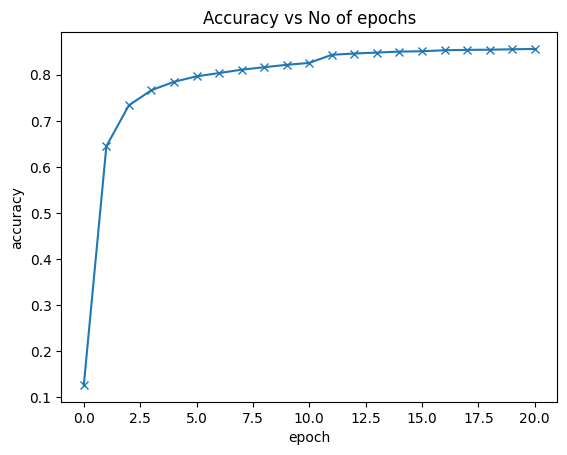

In [201]:
history= [result0] + history1 + history2 + history3 + history4
accuracies=[result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No of epochs')

In [202]:
test_dataset=MNIST(root='/data', train=False , transform=transforms.ToTensor())

shape torch.Size([1, 28, 28])
Label 7


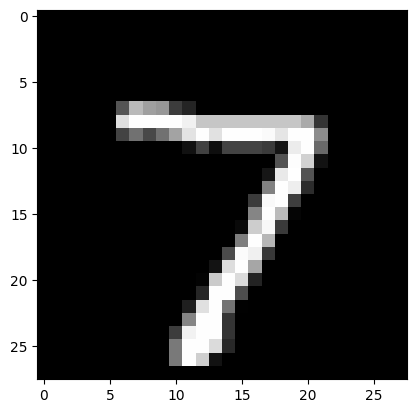

In [204]:
img , label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('shape', img.shape)
print('Label', label)

In [206]:
def predict_image(img, model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _, preds=torch.max(yb, dim=1)
    return preds[0].item()


Label: 7 ,predicted: 7


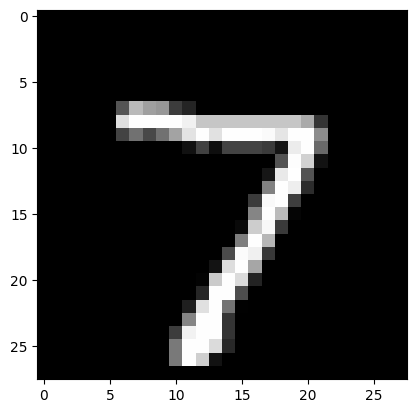

In [208]:
img , label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label  , ',predicted:', predict_image(img, model))


Label: 0 ,predicted: 0


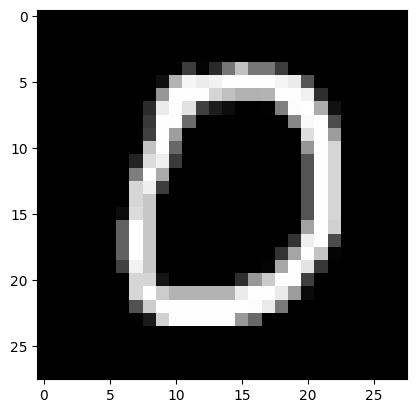

In [209]:
img , label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label  , ',predicted:', predict_image(img, model))


Label: 3 ,predicted: 3


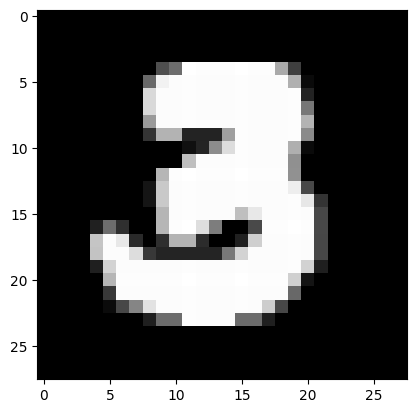

In [210]:
img , label = test_dataset[200]
plt.imshow(img[0], cmap='gray')
print('Label:', label  , ',predicted:', predict_image(img, model))


Label: 9 ,predicted: 4


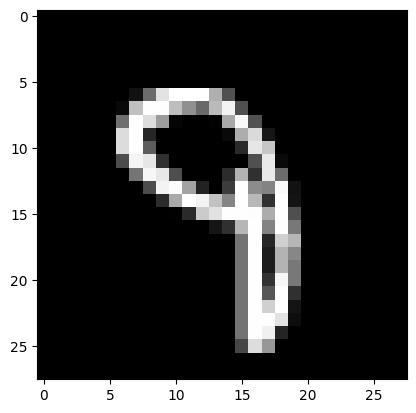

In [211]:
img , label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label  , ',predicted:', predict_image(img, model))


Label: 2 ,predicted: 8


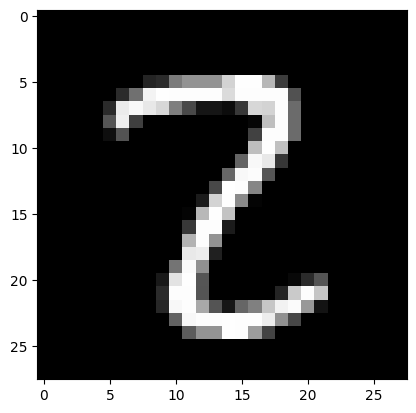

In [212]:
img , label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label  , ',predicted:', predict_image(img, model))


In [213]:
test_loader=DataLoader(test_dataset, batch_size)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5901051759719849, 'val_acc': 0.8672863841056824}

In [214]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [218]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0097,  0.0071,  0.0310,  ..., -0.0103,  0.0204, -0.0355],
                      [-0.0307, -0.0063, -0.0038,  ..., -0.0157, -0.0006, -0.0199],
                      [-0.0046, -0.0036,  0.0016,  ...,  0.0349, -0.0326,  0.0061],
                      ...,
                      [ 0.0164,  0.0083, -0.0330,  ..., -0.0247,  0.0347, -0.0254],
                      [ 0.0177, -0.0207, -0.0143,  ..., -0.0114,  0.0194, -0.0134],
                      [ 0.0034, -0.0116,  0.0132,  ...,  0.0162,  0.0031, -0.0349]])),
             ('linear.bias',
              tensor([-0.0716,  0.1376, -0.0006, -0.0045,  0.0450,  0.0811,  0.0134,  0.0427,
                      -0.0921,  0.0111]))])

In [219]:
model2=MnistModel()

In [220]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0097,  0.0071,  0.0310,  ..., -0.0103,  0.0204, -0.0355],
                      [-0.0307, -0.0063, -0.0038,  ..., -0.0157, -0.0006, -0.0199],
                      [-0.0046, -0.0036,  0.0016,  ...,  0.0349, -0.0326,  0.0061],
                      ...,
                      [ 0.0164,  0.0083, -0.0330,  ..., -0.0247,  0.0347, -0.0254],
                      [ 0.0177, -0.0207, -0.0143,  ..., -0.0114,  0.0194, -0.0134],
                      [ 0.0034, -0.0116,  0.0132,  ...,  0.0162,  0.0031, -0.0349]])),
             ('linear.bias',
              tensor([-0.0716,  0.1376, -0.0006, -0.0045,  0.0450,  0.0811,  0.0134,  0.0427,
                      -0.0921,  0.0111]))])

In [221]:
test_loader=DataLoader(test_dataset, batch_size=256)
result=evaluate(model2, test_loader)
result

{'val_loss': 0.5882512331008911, 'val_acc': 0.8658202886581421}